# Selecting a Model to predict Sea Level using Temperature:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('sea_level_temperature_df.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Linear Regression:

In [3]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression()

In [4]:
y_pred = linear_regressor.predict(X)
y_pred

array([-1.44029132, 21.61542596, 22.63018853,  0.73971651, 21.28838647,
       46.42330327, 31.44494266, 28.20903253, 33.93791397, 43.89268037,
       41.12951798, 33.6724232 , 39.17890785, 41.90803038, 47.04853753,
       33.51773499, 42.61042319, 49.08639948, 35.91769052, 37.15890692,
       64.56346236])

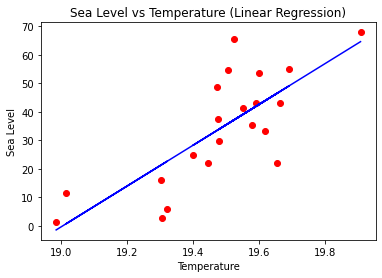

In [21]:
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_regressor.predict(X), color = 'blue')
plt.title('Sea Level vs Temperature (Linear Regression)')
plt.xlabel('Temperature')
plt.ylabel('Sea Level')
plt.show()

In [27]:
linear_regressor.predict([[22]])

array([214.2731713])

# Polinomial Regression:

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree = 2)
X_poly = poly_regressor.fit_transform(X)

poly_linear_regressor = LinearRegression()
poly_linear_regressor.fit(X_poly, y)

LinearRegression()

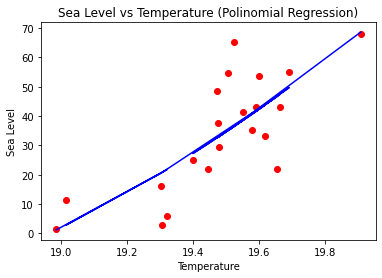

In [22]:
plt.scatter(X, y, color = 'red')
plt.plot(X, poly_linear_regressor.predict(poly_regressor.fit_transform(X)), color = 'blue')
plt.title('Sea Level vs Temperature (Polinomial Regression)')
plt.xlabel('Temperature')
plt.ylabel('Sea Level')
plt.show()

In [10]:
poly_linear_regressor.predict(poly_regressor.fit_transform([[40]]))

array([10000.57782135])

# Support Vector Regression:

In [11]:
svr_y = y.reshape(len(y),1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

svr_X = sc_X.fit_transform(X)
svr_y = sc_y.fit_transform(svr_y)

In [12]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf', degree=2)
# svr_regressor = SVR(kernel = 'poly')
# svr_regressor = SVR(kernel = 'sigmoid')
svr_regressor.fit(svr_X, svr_y)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(degree=2)

In [13]:
sc_y.inverse_transform(svr_regressor.predict(sc_X.transform([[40]])))

array([28.95613012])

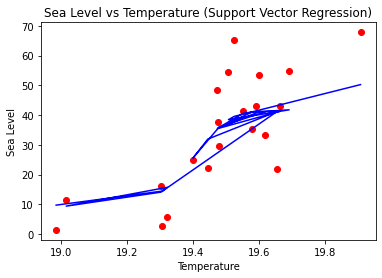

In [23]:
plt.scatter(sc_X.inverse_transform(svr_X), sc_y.inverse_transform(svr_y), color = 'red')
plt.plot(sc_X.inverse_transform(svr_X), sc_y.inverse_transform(svr_regressor.predict(svr_X)), color = 'blue')
plt.title('Sea Level vs Temperature (Support Vector Regression)')
plt.xlabel('Temperature')
plt.ylabel('Sea Level')
plt.show()

# Decision Tree Regression

In [15]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(max_depth=3)
decision_tree_regressor.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [16]:
decision_tree_regressor.predict([[20]])

array([67.86666667])

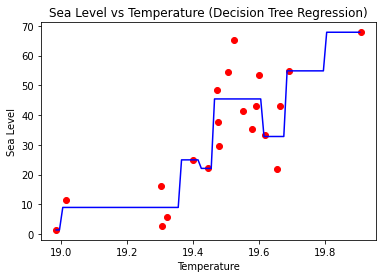

In [24]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, decision_tree_regressor.predict(X_grid), color = 'blue')
plt.title('Sea Level vs Temperature (Decision Tree Regression)')
plt.xlabel('Temperature')
plt.ylabel('Sea Level')
plt.show()

# Random Forest Regression

In [18]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators = 1000, random_state = 0)
random_forest_regressor.fit(X, y)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [19]:
random_forest_regressor.predict([[50]])

array([60.43275833])

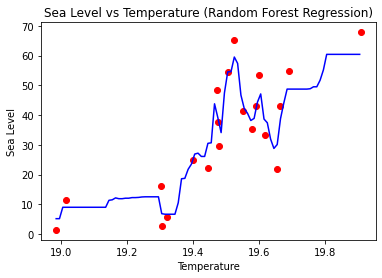

In [25]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, random_forest_regressor.predict(X_grid), color = 'blue')
plt.title('Sea Level vs Temperature (Random Forest Regression)')
plt.xlabel('Temperature')
plt.ylabel('Sea Level')
plt.show()